In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import scipy as sp

In [9]:
clim = pd.read_csv('min_max_rain.csv')
min_temp = clim['min_temp']
max_temp = clim['max_temp']
rain = clim['rain']
n = clim.shape[0]
clim

,Year,Month,Day,max_temp,rain,min_temp
0,1955,3,1,27.2,0.0,11.7
1,1955,3,2,28.8,0.0,14.3
2,1955,3,3,28.8,0.0,15.5
3,1955,3,4,22.7,0.0,17.0
4,1955,3,5,21.6,0.0,11.3
...,...,...,...,...,...,...
24171,2021,5,4,18.3,0.0,9.1
24172,2021,5,5,18.1,0.0,7.1
24173,2021,5,6,22.2,0.0,8.2
24174,2021,5,7,21.8,0.0,12.0


In [10]:
rvs_min = np.random.uniform(-0.05, 0.05, size=n)
rvs_max = np.random.uniform(-0.05, 0.05, size=n)
rvs_rain = np.random.uniform(-0.05, 0.05, size=n)

In [11]:
clim['min_temp_r'] = clim['min_temp'] + rvs_min
clim['max_temp_r'] = clim['max_temp'] + rvs_max
clim['rain_r'] = clim['rain'] + rvs_rain
clim['date_index'] = clim['Year'].map(str) +'-'+ clim['Month'].map(str) +'-'+ clim['Day'].map(str)
clim['date_index'] = pd.to_datetime(clim['date_index'])
clim

,Year,Month,Day,max_temp,rain,min_temp,min_temp_r,max_temp_r,rain_r,date_index
0,1955,3,1,27.2,0.0,11.7,11.694772,27.171644,-0.005000,1955-03-01
1,1955,3,2,28.8,0.0,14.3,14.254384,28.817140,0.027010,1955-03-02
2,1955,3,3,28.8,0.0,15.5,15.507119,28.844177,-0.037744,1955-03-03
3,1955,3,4,22.7,0.0,17.0,17.023714,22.723884,0.020431,1955-03-04
4,1955,3,5,21.6,0.0,11.3,11.251704,21.643833,0.003574,1955-03-05
...,...,...,...,...,...,...,...,...,...,...
24171,2021,5,4,18.3,0.0,9.1,9.128022,18.302116,0.011499,2021-05-04
24172,2021,5,5,18.1,0.0,7.1,7.129802,18.118983,0.023190,2021-05-05
24173,2021,5,6,22.2,0.0,8.2,8.161603,22.245730,-0.016715,2021-05-06
24174,2021,5,7,21.8,0.0,12.0,12.040179,21.792615,0.007599,2021-05-07


In [12]:
del clim['Year']
del clim['Month']
del clim['Day']
clim

,max_temp,rain,min_temp,min_temp_r,max_temp_r,rain_r,date_index
0,27.2,0.0,11.7,11.694772,27.171644,-0.005000,1955-03-01
1,28.8,0.0,14.3,14.254384,28.817140,0.027010,1955-03-02
2,28.8,0.0,15.5,15.507119,28.844177,-0.037744,1955-03-03
3,22.7,0.0,17.0,17.023714,22.723884,0.020431,1955-03-04
4,21.6,0.0,11.3,11.251704,21.643833,0.003574,1955-03-05
...,...,...,...,...,...,...,...
24171,18.3,0.0,9.1,9.128022,18.302116,0.011499,2021-05-04
24172,18.1,0.0,7.1,7.129802,18.118983,0.023190,2021-05-05
24173,22.2,0.0,8.2,8.161603,22.245730,-0.016715,2021-05-06
24174,21.8,0.0,12.0,12.040179,21.792615,0.007599,2021-05-07


In [13]:
x=0
for ra in clim['rain_r'].items():
    if ra[1] < 0.05:
        clim.loc[ra[0], 'rain_r'] = 0
clim

,max_temp,rain,min_temp,min_temp_r,max_temp_r,rain_r,date_index
0,27.2,0.0,11.7,11.694772,27.171644,0.0,1955-03-01
1,28.8,0.0,14.3,14.254384,28.817140,0.0,1955-03-02
2,28.8,0.0,15.5,15.507119,28.844177,0.0,1955-03-03
3,22.7,0.0,17.0,17.023714,22.723884,0.0,1955-03-04
4,21.6,0.0,11.3,11.251704,21.643833,0.0,1955-03-05
...,...,...,...,...,...,...,...
24171,18.3,0.0,9.1,9.128022,18.302116,0.0,2021-05-04
24172,18.1,0.0,7.1,7.129802,18.118983,0.0,2021-05-05
24173,22.2,0.0,8.2,8.161603,22.245730,0.0,2021-05-06
24174,21.8,0.0,12.0,12.040179,21.792615,0.0,2021-05-07


In [14]:
clim['min_temp_r_r'] = clim['min_temp_r'].rolling(window=5).mean()
clim['max_temp_r_r'] = clim['max_temp_r'].rolling(window=5).mean()
clim['rain_r_r'] = clim['rain_r'].rolling(window=5).mean()
clim

,max_temp,rain,min_temp,min_temp_r,max_temp_r,rain_r,date_index,min_temp_r_r,max_temp_r_r,rain_r_r
0,27.2,0.0,11.7,11.694772,27.171644,0.0,1955-03-01,NaN,NaN,NaN
1,28.8,0.0,14.3,14.254384,28.817140,0.0,1955-03-02,NaN,NaN,NaN
2,28.8,0.0,15.5,15.507119,28.844177,0.0,1955-03-03,NaN,NaN,NaN
3,22.7,0.0,17.0,17.023714,22.723884,0.0,1955-03-04,NaN,NaN,NaN
4,21.6,0.0,11.3,11.251704,21.643833,0.0,1955-03-05,13.946339,25.840136,0.0
...,...,...,...,...,...,...,...,...,...,...
24171,18.3,0.0,9.1,9.128022,18.302116,0.0,2021-05-04,11.318932,22.667216,0.0
24172,18.1,0.0,7.1,7.129802,18.118983,0.0,2021-05-05,11.054863,21.108504,0.0
24173,22.2,0.0,8.2,8.161603,22.245730,0.0,2021-05-06,9.730804,19.770074,0.0
24174,21.8,0.0,12.0,12.040179,21.792615,0.0,2021-05-07,9.320172,20.019787,0.0


In [15]:
rain = clim['rain_r_r']
mint = clim['min_temp_r_r']

In [16]:
nans_ra = clim[clim['rain_r_r'].isnull()].index
for i in nans_ra:
    clim = clim.drop(i)

zrs_ra = clim[clim['rain_r_r']==0].index
for i in zrs_ra:
    clim = clim.drop(i)
    
nans_min = clim[clim['min_temp_r_r'].isnull()].index
for i in nans_min:
    clim = clim.drop(i)
    
nans_max = clim[clim['max_temp_r_r'].isnull()].index
for i in nans_max:
    clim = clim.drop(i)

if clim.isnull().values.sum() != 0:
    print('Something has gone wrong')
else:
    print('All good')

All good


In [17]:
rain_gamma = stats.gamma.fit(clim['rain_r_r'])
[a_r, loc_r, scale_r] = rain_gamma
print('Rainfall (Gamma)\n(a, loc, scale) = ', rain_gamma)
min_temp_gumbel = stats.gumbel_r.fit(clim['min_temp_r_r'])
[loc_m, scale_m] = min_temp_gumbel
print('Miniumum Temperature (Gumbel)\n(loc, scale) = ', min_temp_gumbel)

Rainfall (Gamma)
(a, loc, scale) =  (0.8286132170723406, 4.440891633584047e-17, 2.0622389338454497)
Miniumum Temperature (Gumbel)
(loc, scale) =  (9.169028837913565, 3.1978854628167483)


From the paper this all comes from, we want to test whether cold periods are accompanied by small precipitation amount.

In [18]:
rain = clim['rain_r_r']
mint = clim['min_temp_r_r']
test = stats.gamma.rvs(a_r, loc_r, scale_r, size=24176)

# sns.displot(rain)
# sns.displot(mint)
# sns.displot(test)

U_r = stats.gamma.cdf(rain, a_r, loc_r, scale_r)
U_m = stats.gumbel_r.cdf(mint, loc_m, scale_m)
U_t = stats.gamma.cdf(test, a_r, loc_r, scale_r)

# sns.displot(U_r)
# sns.displot(U_m)
# sns.displot(U_t)

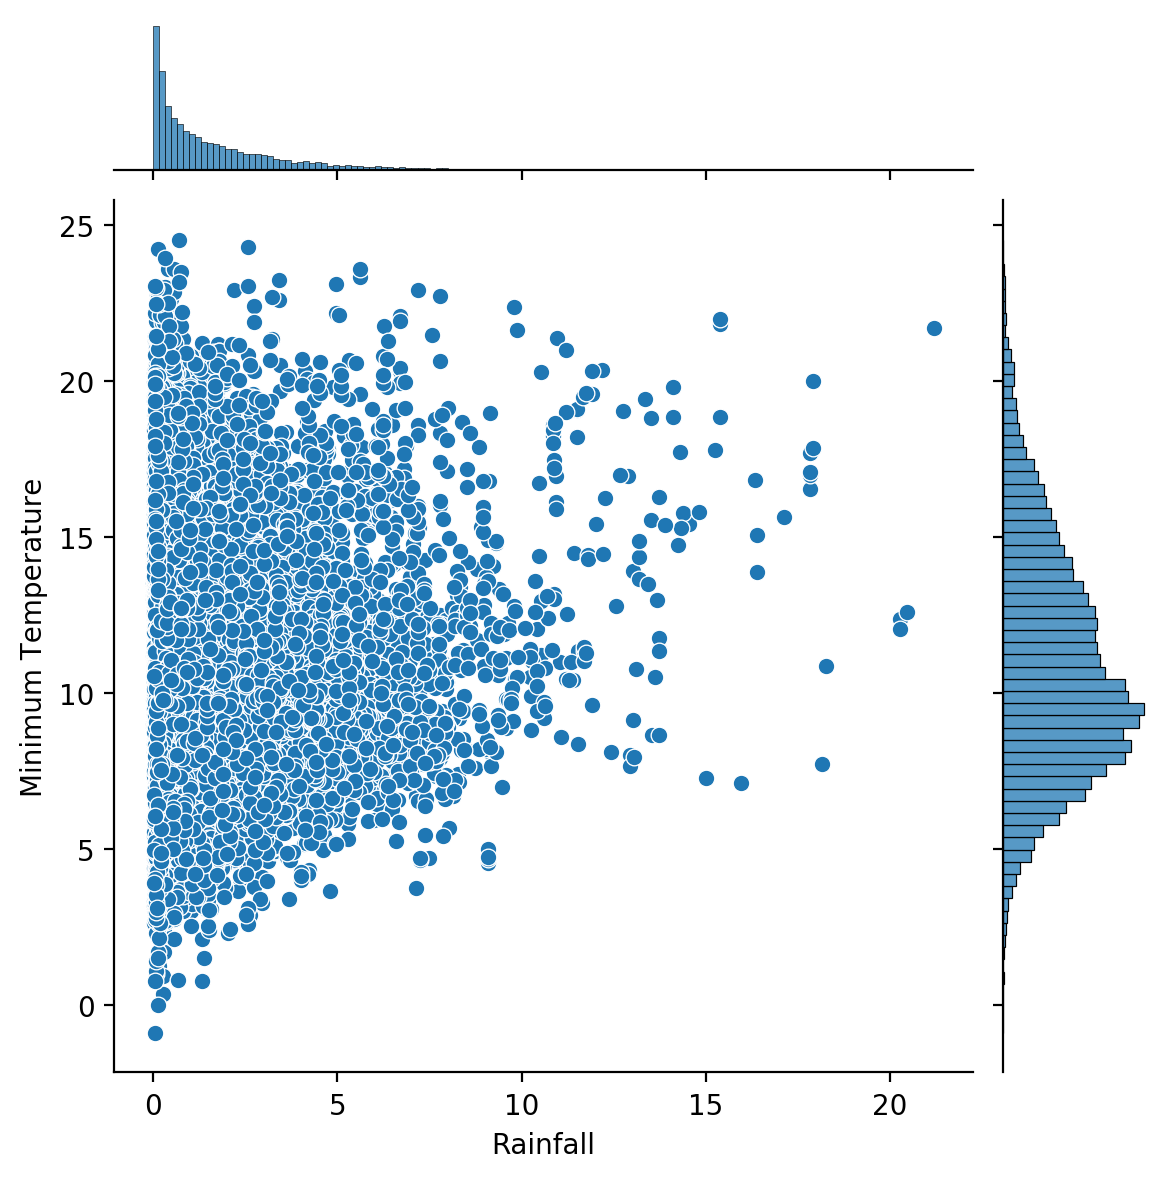

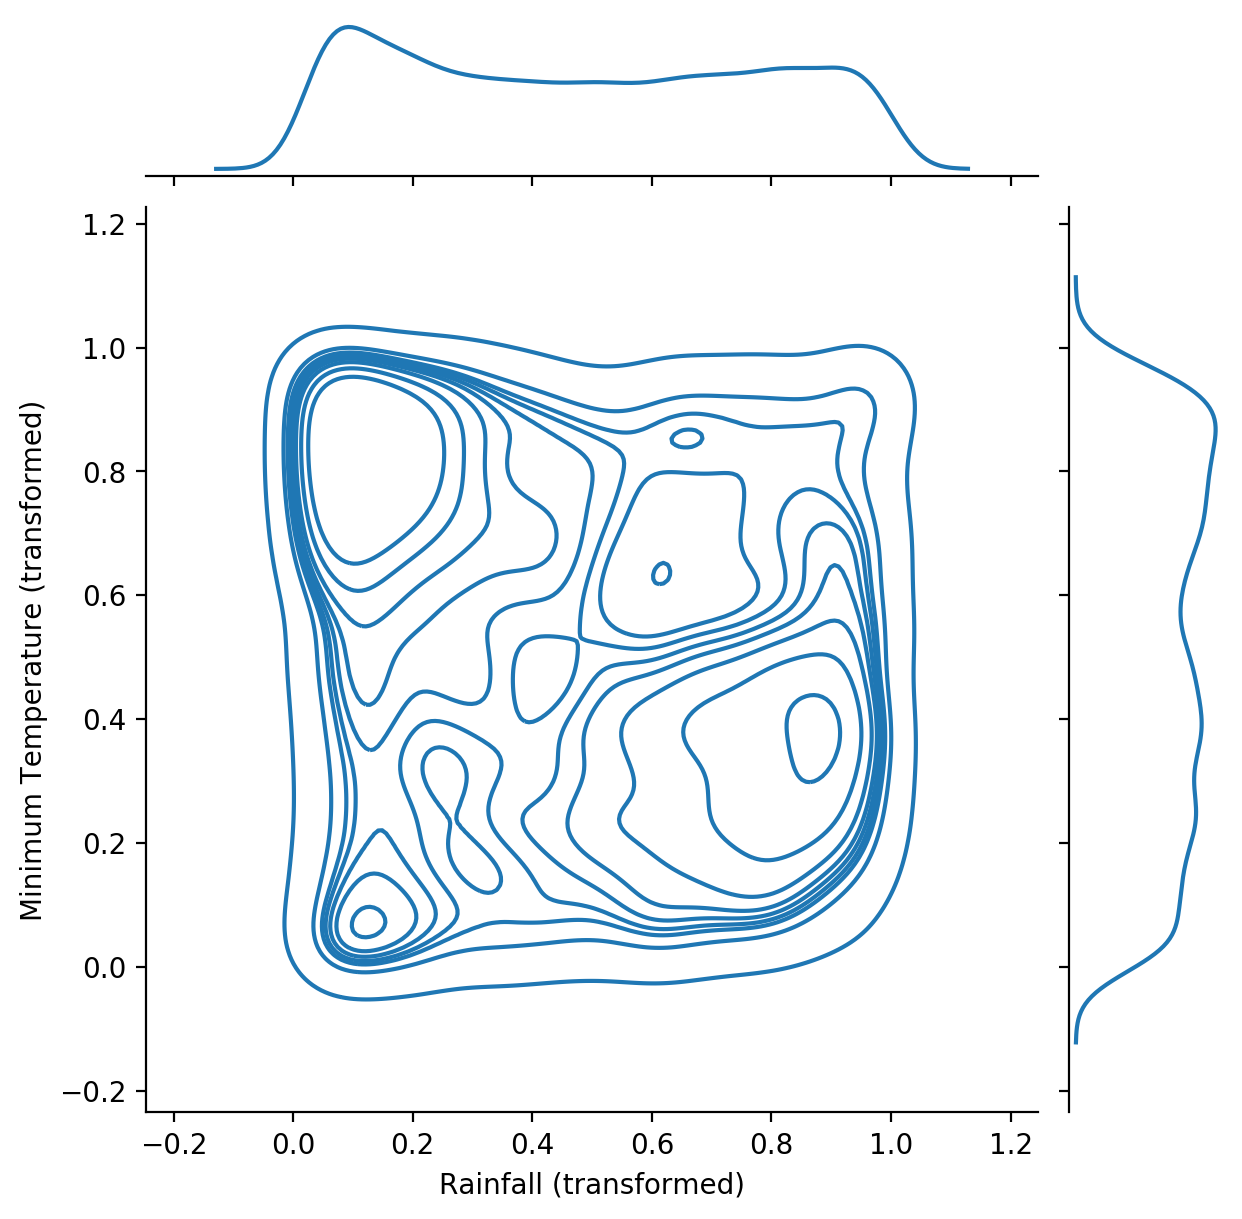

In [23]:
D = sns.jointplot(x=rain, y=mint)
D.set_axis_labels('Rainfall', 'Minimum Temperature')
U = sns.jointplot(x=U_r, y=U_m, kind='kde')
U.set_axis_labels('Rainfall (transformed)', 'Minimum Temperature (transformed)')

In [20]:
print(stats.spearmanr(U_r, U_m))
print(stats.kendalltau(U_r, U_m))
print(stats.kendalltau(mint, rain))

SpearmanrResult(correlation=-0.11390086676431112, pvalue=2.6362094934194466e-50)
KendalltauResult(correlation=-0.07402493076476561, pvalue=1.3673348281280746e-47)
KendalltauResult(correlation=-0.07402493076476561, pvalue=1.3673348281280746e-47)
